## Analyse des données Vigilo pour identifier les heures où ont lieu les observations

In [1]:
%matplotlib inline

import requests
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Getting data
resp = requests.get('https://vigilo.jesuisundesdeux.org/get_issues.php')
df = pd.DataFrame(resp.json())

print(df)

         token     coordinates_lat     coordinates_lon  \
0     3FD303C7            43.61018             3.88482   
1     E869FEBA    43.6017669084919     3.8572752980815   
2     A048A4DB   43.61796307250997  3.8378092646598816   
3     287FD240  43.600851970161024   3.858477986134648   
4     0E9CE26F   43.60270980192001   3.855441823986952   
...        ...                 ...                 ...   
9959  89XQVRSN   43.60764910469699    3.87816989430601   
9960  GDECILXJ   43.59026055373006  3.8521778463105742   
9961  534E0TBV   43.59244798819907   3.842795481584914   
9962  Q6ZDHE60   43.59831843324888  3.8463419832739163   
9963  3PRXBD9H   43.59240913570488  3.8426613783593897   

                                          address  \
0     allée Henri II de Montmorency , Montpellier   
1                  Rue des Chasseurs, Montpellier   
2                   Rue Robert Fabre, Montpellier   
3                  Rue des Chasseurs, Montpellier   
4                  Rue des Chasseurs, 

In [2]:
# Separating week days and weekends
df.time = pd.to_datetime(df.time, unit='s')
df['day_type'] = 'week'
df.loc[df.time.apply(lambda x: x.weekday() > 4), 'day_type'] = 'weekend'

/tmp/ipykernel_11943/1340941974.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
/tmp/ipykernel_11943/1340941974.py:5: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df.categorie != '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
/tmp/ipykernel_11943/1340941974.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'weekend')].time.apply(lambda x: x.hour),
/tmp/ipykernel_11943/1340941974.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This

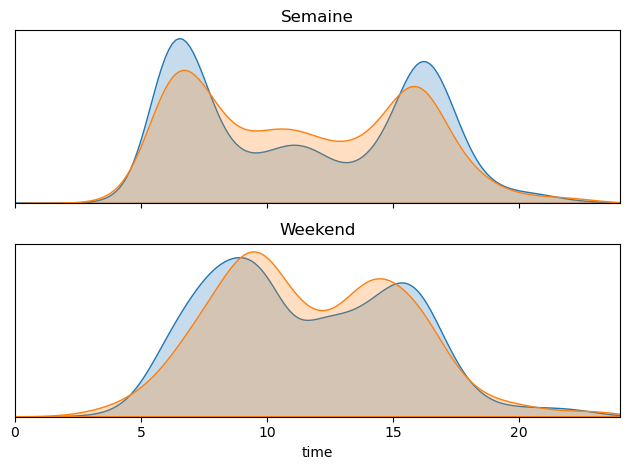

In [3]:
fig, (ax1, ax2) = plt.subplots(2, sharex=True)

sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
            shade=True, legend='GCUM', label='GCUM', ax=ax1)
sns.kdeplot(df[(df.categorie != '2') & (df.day_type == 'week')].time.apply(lambda x: x.hour),
            shade=True, label='Autres', ax=ax1)
# sns.kdeplot(df[df.day_type == 'week'].time.apply(lambda x: x.hour),
#             shade=True, label='Total', ax=ax1)
sns.kdeplot(df[(df.categorie == '2') & (df.day_type == 'weekend')].time.apply(lambda x: x.hour),
            shade=True, legend='GCUM', label='GCUM', ax=ax2)
sns.kdeplot(df[(df.categorie != '2') & (df.day_type == 'weekend')].time.apply(lambda x: x.hour),
            shade=True, label='Autres', ax=ax2)
# sns.kdeplot(df[df.day_type == 'weekend'].time.apply(lambda x: x.hour),
#             shade=True, label='Total', ax=ax2)

ax1.set_title('Semaine')
ax2.set_title('Weekend')

ax1.set_xbound(0, 24)

ax1.get_yaxis().set_visible(False)
ax2.get_yaxis().set_visible(False)

plt.tight_layout()

plt.show()